In [ ]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.6 MB/s eta 0:00:00


In [ ]:
!pip install librosa==0.10.1

In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import wavfile as wav
from sklearn.decomposition import PCA
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

In [ ]:
! kaggle datasets download -d aniruth100/baby-cry-detection

Dataset URL: https://www.kaggle.com/datasets/aniruth100/baby-cry-detection
License(s): unknown
 85% 33.0M/39.0M [00:00<00:00, 93.7MB/s]
100% 39.0M/39.0M [00:00<00:00, 104MB/s] 


In [ ]:
!unzip baby-cry-detection.zip && rm baby-cry-detection.zip

Archive:  baby-cry-detection.zip
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav  
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138495-1.0-m-72-bp.wav  
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138506-1.0-m-72-bp.wav  
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138514-1.0-m-72-bp.wav  
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138524-1.0-m-72-bp.wav  
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138536-1.0-m-72-bp.wav  
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138545-1.0-m-72-bp.wav  
  inflating: donateacry_corpus_cl

In [ ]:
def traverse_subfolders(subfolders):
    audio_files = []
    subfolder_names = []

    for subfolder in subfolders:
        subfolder_name = os.path.basename(subfolder)
        audio_files.extend(get_audio_files(subfolder))
        subfolder_names.extend([subfolder_name] * len(get_audio_files(subfolder)))

    return audio_files, subfolder_names

def get_audio_files(subfolder):
    audio_files = []

    for root, dirs, files in os.walk(subfolder):
        for file in files:
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))

    return audio_files

In [ ]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

def process_audio_files(audio_files, subfolder_names, n_components):
    data = []

    for audio_file, subfolder_name in zip(audio_files, subfolder_names):
        compressed_data = features_extractor(audio_file)  # Extract MFCC features

        data.append([audio_file, compressed_data, subfolder_name])

    df = pd.DataFrame(data, columns=["File", "Compressed Data", "Subfolder Name"])
    return df

In [ ]:
def compress_audio_pca(audio_data, n_components):
    # Reshape audio data to a 2D array
    audio_data_2d = audio_data.reshape(-1, 1)

    # Apply PCA
    pca = PCA(n_components=n_components)
    compressed_data_2d = pca.fit_transform(audio_data_2d)

    # Restore the compressed data to its original shape
    compressed_data = compressed_data_2d.reshape(-1)

    return compressed_data

In [ ]:
# subfolders = ['/content/gdrive/MyDrive/babydata/donateacry_corpus_cleaned_and_updated_data/belly_pain',
#               '/content/gdrive/MyDrive/babydata/donateacry_corpus_cleaned_and_updated_data/burping',
#               '/content/gdrive/MyDrive/babydata/donateacry_corpus_cleaned_and_updated_data/discomfort',
#               '/content/gdrive/MyDrive/babydata/donateacry_corpus_cleaned_and_updated_data/hungry',
#               '/content/gdrive/MyDrive/babydata/donateacry_corpus_cleaned_and_updated_data/tired']
subfolders = ['/content/donateacry_corpus_cleaned_and_updated_data/belly_pain',
              '/content/donateacry_corpus_cleaned_and_updated_data/burping',
              '/content/donateacry_corpus_cleaned_and_updated_data/discomfort',
              '/content/donateacry_corpus_cleaned_and_updated_data/hungry',
              '/content/donateacry_corpus_cleaned_and_updated_data/tired']

n_components = 1

audio_files, subfolder_names = traverse_subfolders(subfolders)
df = process_audio_files(audio_files, subfolder_names, n_components)
print(df)

                                                  File  \
0    /content/donateacry_corpus_cleaned_and_updated...   
1    /content/donateacry_corpus_cleaned_and_updated...   
2    /content/donateacry_corpus_cleaned_and_updated...   
3    /content/donateacry_corpus_cleaned_and_updated...   
4    /content/donateacry_corpus_cleaned_and_updated...   
..                                                 ...   
452  /content/donateacry_corpus_cleaned_and_updated...   
453  /content/donateacry_corpus_cleaned_and_updated...   
454  /content/donateacry_corpus_cleaned_and_updated...   
455  /content/donateacry_corpus_cleaned_and_updated...   
456  /content/donateacry_corpus_cleaned_and_updated...   

                                       Compressed Data Subfolder Name  
0    [-395.50275, 134.50542, -40.998844, -3.8517056...     belly_pain  
1    [-433.8168, 93.447205, 0.1912858, -10.415295, ...     belly_pain  
2    [-237.06866, 148.7104, -146.33049, -1.1878089,...     belly_pain  
3    [-395.3091

In [ ]:
df = df.drop("File",axis=1)

In [ ]:
data = df.to_csv("Audio_data.csv", index=False)

In [ ]:
df.head()

,Compressed Data,Subfolder Name
0,"[-395.50275, 134.50542, -40.998844, -3.8517056...",belly_pain
1,"[-433.8168, 93.447205, 0.1912858, -10.415295, ...",belly_pain
2,"[-237.06866, 148.7104, -146.33049, -1.1878089,...",belly_pain
3,"[-395.3091, 128.01906, -47.220932, 1.3578547, ...",belly_pain
4,"[-428.3942, 148.9, -69.30619, -15.013275, 28.9...",belly_pain


In [ ]:
df.shape

(457, 2)

In [ ]:
for i in range(457):
    df["shape"] = len(df["Compressed Data"][i])
df.head()

,Compressed Data,Subfolder Name,shape
0,"[-395.50275, 134.50542, -40.998844, -3.8517056...",belly_pain,40
1,"[-433.8168, 93.447205, 0.1912858, -10.415295, ...",belly_pain,40
2,"[-237.06866, 148.7104, -146.33049, -1.1878089,...",belly_pain,40
3,"[-395.3091, 128.01906, -47.220932, 1.3578547, ...",belly_pain,40
4,"[-428.3942, 148.9, -69.30619, -15.013275, 28.9...",belly_pain,40


In [ ]:
len(df["Compressed Data"][0])

40

In [ ]:
df.rename(columns={"Subfolder Name":"class"},inplace=True)
df.head()

,Compressed Data,class,shape
0,"[-395.50275, 134.50542, -40.998844, -3.8517056...",belly_pain,40
1,"[-433.8168, 93.447205, 0.1912858, -10.415295, ...",belly_pain,40
2,"[-237.06866, 148.7104, -146.33049, -1.1878089,...",belly_pain,40
3,"[-395.3091, 128.01906, -47.220932, 1.3578547, ...",belly_pain,40
4,"[-428.3942, 148.9, -69.30619, -15.013275, 28.9...",belly_pain,40


[]

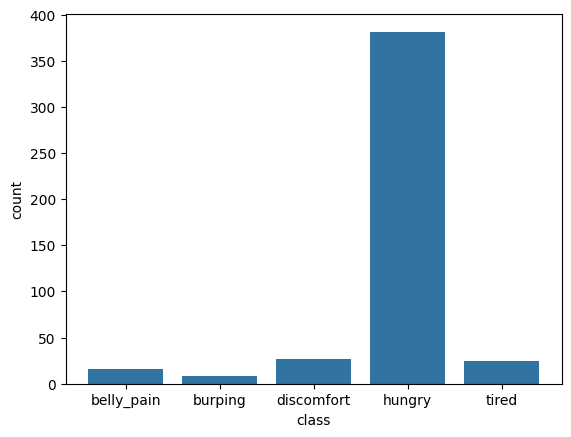

In [ ]:
sns.countplot(x="class",data=df)
plt.plot()

In [ ]:
x = df["Compressed Data"]
y=df["class"]
x.shape

(457,)

In [ ]:
resamp = RandomOverSampler()
x = x.to_numpy()
x=x.reshape(-1,1)
x,y=resamp.fit_resample(x,y)

[]

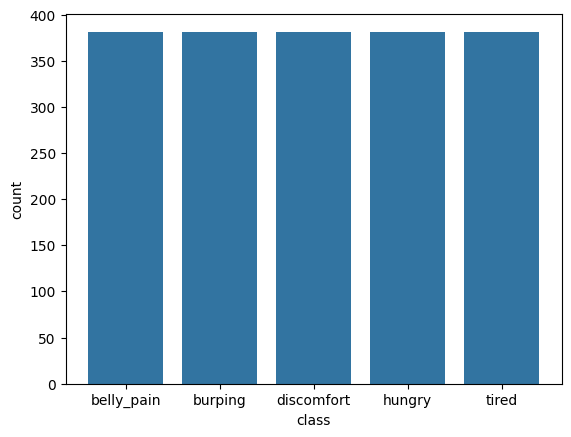

In [ ]:
sns.countplot(x=y,data=df)
plt.plot()

In [ ]:
x.shape

(1910, 1)

In [ ]:
df.shape

(457, 3)

In [ ]:
data = {'Data': x, 'class': y}

In [ ]:
df = pd.DataFrame(x,columns=["Data"])
df["class"]=y
df["class"].value_counts()

class
belly_pain    382
burping       382
discomfort    382
hungry        382
tired         382
Name: count, dtype: int64

In [ ]:
df.head()

,Data,class
0,"[-395.50275, 134.50542, -40.998844, -3.8517056...",belly_pain
1,"[-433.8168, 93.447205, 0.1912858, -10.415295, ...",belly_pain
2,"[-237.06866, 148.7104, -146.33049, -1.1878089,...",belly_pain
3,"[-395.3091, 128.01906, -47.220932, 1.3578547, ...",belly_pain
4,"[-428.3942, 148.9, -69.30619, -15.013275, 28.9...",belly_pain


In [ ]:
df_new = df["Data"].apply(pd.Series)
df_result = pd.concat([df, df_new], axis=1)
df_result = df_result.drop('Data', axis=1)
df_result.head()

,class,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,belly_pain,-395.502747,134.505417,-40.998844,-3.851706,10.750525,-36.928837,-15.562063,-5.356579,-29.510025,...,0.759147,0.411946,-1.037288,2.146250,0.676931,-0.602084,1.970804,0.503776,-0.253919,1.737532
1,belly_pain,-433.816803,93.447205,0.191286,-10.415295,-4.081223,-18.815042,-16.638805,-10.185334,-17.012871,...,-2.831712,-2.366786,-2.001395,0.382160,3.128866,3.084163,2.075775,1.525259,0.601508,-0.211883
2,belly_pain,-237.068665,148.710403,-146.330490,-1.187809,44.948959,-58.268803,1.442255,29.391651,-38.799988,...,1.655973,-1.470412,-2.658791,0.266013,-3.559617,-0.808205,2.748302,-1.827027,0.277514,3.336380
3,belly_pain,-395.309113,128.019058,-47.220932,1.357855,6.530758,-44.836468,-9.678618,-2.140578,-32.203331,...,0.601744,0.406329,0.783114,3.810851,1.448685,1.561575,2.884349,-0.906371,-0.490420,1.127987
4,belly_pain,-428.394196,148.899994,-69.306190,-15.013275,28.952463,-38.647449,-25.540077,20.923855,0.108426,...,-1.747066,-1.583262,-3.561582,-2.258053,-0.548404,-0.859211,-0.291567,0.219600,0.446263,0.523342


In [ ]:
df_result.shape

(1910, 41)

In [ ]:
x = df_result.drop("class",axis=1)
y = df_result["class"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1432, 40)
(1432,)
(478, 40)
(478,)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.327731,-0.032240,-0.080774,0.522970,0.606356,0.090534,0.761641,1.011297,-0.510242,-2.208589,...,-0.826524,-0.401323,-0.716687,-1.622270,-1.074985,-0.508670,-1.007225,-1.147264,-0.754940,-0.346586
1,1.330087,0.162951,-2.270108,0.411993,0.999491,-1.678603,2.372523,1.874586,-2.059700,0.188279,...,1.046532,-0.648392,-0.266684,0.526174,-0.919452,-0.378508,-0.348176,-1.299952,-0.551189,-0.256789
2,0.510816,1.040386,0.025800,0.377320,-0.111347,-1.034461,-1.182298,-1.085300,-1.225592,-0.428455,...,1.422365,1.381010,1.732092,2.001927,0.177353,-0.142533,0.652605,0.181993,0.341981,0.724240
3,1.500220,0.100370,-0.908009,0.764809,1.141829,0.068861,1.399888,0.279999,-0.261698,3.085170,...,0.090319,2.638225,4.240597,2.575001,0.287383,0.677779,-0.328155,-2.357824,0.478789,3.389734
4,-1.310994,-0.235480,0.523834,-0.295684,-0.331321,0.376001,-0.061946,0.812532,1.285192,-0.316006,...,-0.828489,0.536885,0.621891,-0.190920,0.628839,-0.036457,-0.535494,0.078331,-0.638040,-0.558296


In [ ]:
num_classes = 5

In [ ]:
from keras.utils import to_categorical

In [ ]:
print(y_train.head())

360         hungry
1109       burping
814     belly_pain
381         hungry
1359    discomfort
Name: class, dtype: object


In [ ]:
print(y_test.head())

1785      tired
825     burping
921     burping
240      hungry
135      hungry
Name: class, dtype: object


In [ ]:
label_mapping = {
    'burping': 0,
    'discomfort': 1,
    'hungry': 2,
    'tired': 3,
    'belly_pain': 4
}

y_train = y_train.map(label_mapping)
y_test = y_test.map(label_mapping)

In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Flatten

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
snapshot_folder='model'
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=5)
mc = ModelCheckpoint(snapshot_folder+'/CNN_Model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
bs=60

In [ ]:
history= model.fit(x_train, y_train ,epochs=100, callbacks=[es,mc], batch_size=bs, validation_data=(x_test,y_test))

Epoch 1/100
20/24 [========================>.....] - ETA: 0s - loss: 1.5880 - accuracy: 0.3158
Epoch 1: val_accuracy improved from -inf to 0.51464, saving model to model/CNN_Model.hdf5
24/24 [==============================] - 5s 24ms/step - loss: 1.5593 - accuracy: 0.3303 - val_loss: 1.3505 - val_accuracy: 0.5146
Epoch 2/100
18/24 [=====================>........] - ETA: 0s - loss: 1.3301 - accuracy: 0.4833
Epoch 2: val_accuracy improved from 0.51464 to 0.61088, saving model to model/CNN_Model.hdf5
24/24 [==============================] - 0s 6ms/step - loss: 1.3073 - accuracy: 0.4937 - val_loss: 1.1856 - val_accuracy: 0.6109
Epoch 3/100
 1/24 [>.............................] - ETA: 0s - loss: 1.1848 - accuracy: 0.4667

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/24 [=================>............] - ETA: 0s - loss: 1.1683 - accuracy: 0.5600
Epoch 3: val_accuracy improved from 0.61088 to 0.67782, saving model to model/CNN_Model.hdf5
24/24 [==============================] - 0s 10ms/step - loss: 1.1521 - accuracy: 0.5775 - val_loss: 1.0478 - val_accuracy: 0.6778
Epoch 4/100
20/24 [========================>.....] - ETA: 0s - loss: 1.0281 - accuracy: 0.6450
Epoch 4: val_accuracy improved from 0.67782 to 0.70502, saving model to model/CNN_Model.hdf5
24/24 [==============================] - 0s 9ms/step - loss: 1.0156 - accuracy: 0.6529 - val_loss: 0.9213 - val_accuracy: 0.7050
Epoch 5/100
23/24 [===========================>..] - ETA: 0s - loss: 0.8982 - accuracy: 0.7014
Epoch 5: val_accuracy improved from 0.70502 to 0.73849, saving model to model/CNN_Model.hdf5
24/24 [==============================] - 0s 10ms/step - loss: 0.8942 - accuracy: 0.7032 - val_loss: 0.8172 - val_accuracy: 0.7385
Epoch 6/100
23/24 [===========================>..] - ETA: 0

In [ ]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
def Classification_results(X, y_true, model):
    # Making the Confusion Matrix
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    cm = metrics.confusion_matrix(np.argmax(y_true, axis=1), y_pred)
    acc = metrics.accuracy_score(np.argmax(y_true, axis=1), y_pred)
    report = classification_report(np.argmax(y_true, axis=1), y_pred)

    sns.heatmap(cm, annot=True)

    print(f'Confusion Matrix: \n{cm}')
    print(f'accuracy_score: {acc}')
    print(f'report: \n{report}')


45/45 [==============================] - 0s 2ms/step
Confusion Matrix: 
[[297   0   0   0   0]
 [  0 287   0   0   0]
 [  0   1 287   2   0]
 [  0   0   0 277   0]
 [  0   0   0   0 281]]
accuracy_score: 0.9979050279329609
report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       287
           2       1.00      0.99      0.99       290
           3       0.99      1.00      1.00       277
           4       1.00      1.00      1.00       281

    accuracy                           1.00      1432
   macro avg       1.00      1.00      1.00      1432
weighted avg       1.00      1.00      1.00      1432



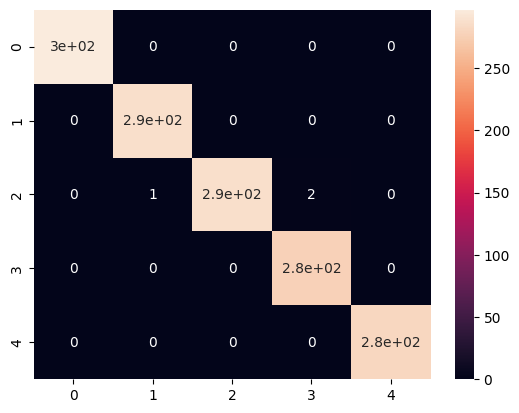

In [ ]:
Classification_results(x_train, y_train, model)

15/15 [==============================] - 0s 5ms/step
Confusion Matrix: 
[[ 85   0   0   0   0]
 [  0  95   0   0   0]
 [  0   2  78   7   5]
 [  0   0   0 105   0]
 [  0   0   0   0 101]]
accuracy_score: 0.9707112970711297
report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       0.98      1.00      0.99        95
           2       1.00      0.85      0.92        92
           3       0.94      1.00      0.97       105
           4       0.95      1.00      0.98       101

    accuracy                           0.97       478
   macro avg       0.97      0.97      0.97       478
weighted avg       0.97      0.97      0.97       478



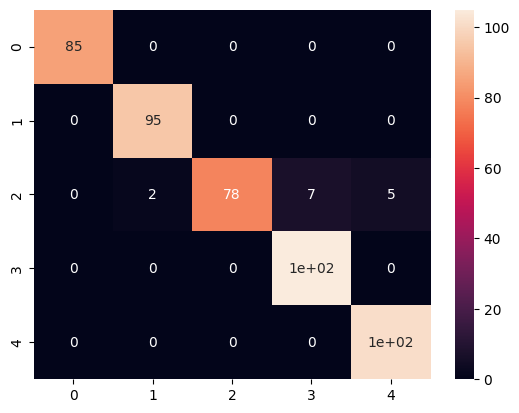

In [ ]:
Classification_results(x_test, y_test, model)

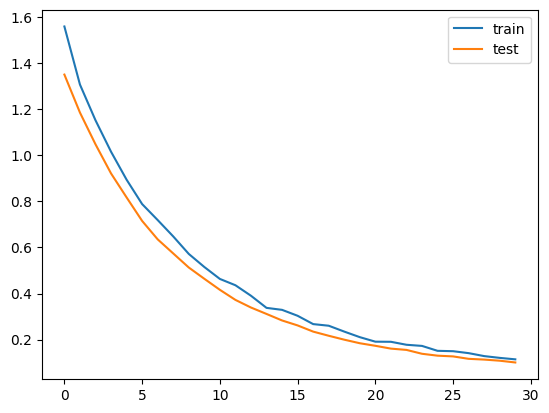

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
train_score, train_acc = model.evaluate(x_train, y_train, batch_size=60)
score, acc = model.evaluate(x_test, y_test, batch_size=60)

print('Train score (loss):', train_score )
print('Train accuracy:', train_acc)
print('Test score (loss):', score)
print('Test accuracy:', acc)

8/8 [==============================] - 0s 4ms/step - loss: 0.1005 - accuracy: 0.9707
Train score (loss): 0.049566060304641724
Train accuracy: 0.9979050159454346
Test score (loss): 0.10054861754179001
Test accuracy: 0.9707112908363342


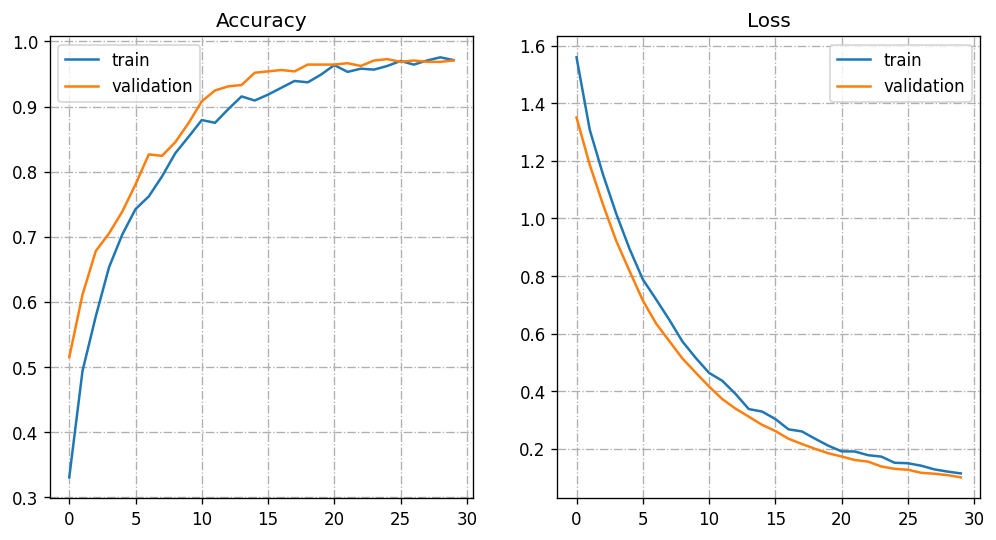

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (10,5), dpi = 120)

axs[0].grid(linestyle="dashdot")
axs[0].set_title("Accuracy")
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].legend(["train", "validation"])

axs[1].grid(linestyle="dashdot")
axs[1].set_title("Loss")
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].legend(["train", "validation"])

In [ ]:
# model.save('/content/gdrive/MyDrive/babydata/model/Model.hdf5')
model.save('Model.h5')

import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow import keras
def predict(audio_path, model_path='Model.h5', scaler_path="scaler.pkl"):
  model = keras.models.load_model(model_path)
  sc = pickle.load(open(scaler_path, 'rb'))

  audio_feature = features_extractor(audio_path)
  df = pd.DataFrame({'Data': [audio_feature]})
  x = df["Data"].apply(pd.Series)
  x = sc.transform(x)
  pred = model.predict(x)
  max_index = np.argmax(pred)
  label_mapping = {
      0: 'burping',
      1: 'discomfort',
      2: 'hungry',
      3: 'tired',
      4: 'belly_pain'
  }
  result = label_mapping[max_index]
  return result, str(round(pred[0][max_index]*100, 2))

In [ ]:
predict('/content/donateacry_corpus_cleaned_and_updated_data/tired/06c4cfa2-7fa6-4fda-91a1-ea186a4acc64-1430029246453-1.7-f-26-ti.wav')

1/1 [==============================] - 0s 69ms/step


('tired', '91.45')